## How to prevent overfitting and Underfitting

In [1]:
from pyforest import*
# lazy_imports()

In [2]:
data = pd.read_csv('fruit_dataset.csv')
data

<IPython.core.display.Javascript object>

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
56,4,lemon,116,5.9,8.10,0.73
57,4,lemon,152,6.5,8.50,0.72
58,4,lemon,118,6.1,8.10,0.70
59,5,mango,201,7.7,10.10,0.71


In [3]:
data['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: count, dtype: int64

In [4]:
data['fruit_label'].value_counts()

fruit_label
1    19
3    19
4    16
2     5
5     2
Name: count, dtype: int64

In [5]:
data.head(1)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55


In [6]:
x = data.iloc[:, 2:5]
y = data['fruit_label']

In [7]:
x.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [8]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

## Preventing Overfitting


    # 1. Using Cross validation
    # 2. Train with more data
    # 3. Remove some Features
    # 4. Regularization

###  Identify Overfitting in Our Dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.2)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

model.fit(x_train, y_train)

D:\Data_Science\project_3\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
from sklearn import metrics

In [14]:
print('Training data score: ',model.score(x_train, y_train)*100)
print('Testing data score: ',model.score(x_test, y_test)*100)

Training data score:  72.91666666666666
Testing data score:  46.15384615384615


    ## we are in overfitting situation
    ## Because the Model can perform good in training Data
    ## but preforms bad on Testing data

In [15]:
data['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: count, dtype: int64

# Solving Overfitting in our Dataset: Train with more data

    # we use: 
        -Resampling Technique:
            1. upsampling/Oversampling
            2. Downsampling/Undersampling

# 1. Upsampling/Oversampling

In [16]:
from sklearn.utils import resample

In [17]:
data['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: count, dtype: int64

In [18]:
# separate the majority and minority classes

mandarin = data[data.fruit_label == 2]
apple = data[data.fruit_label == 1]

# upsample minority class

mandarin_data_upsample = resample(mandarin,replace=True, n_samples= len(apple)-len(mandarin), random_state=1)

mandarin_data_upsample = mandarin_data_upsample.reset_index(drop=True)
mandarin_data_upsample

,fruit_label,fruit_name,mass,width,height,color_score
0,2,mandarin,80,5.9,4.3,0.81
1,2,mandarin,76,5.8,4.0,0.81
2,2,mandarin,86,6.2,4.7,0.80
3,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,86,6.2,4.7,0.80
6,2,mandarin,86,6.2,4.7,0.80
7,2,mandarin,84,6.0,4.6,0.79
8,2,mandarin,76,5.8,4.0,0.81
9,2,mandarin,76,5.8,4.0,0.81


In [19]:
df = [data,mandarin_data_upsample]

new_data = pd.concat(df,axis = 0)
new_data['fruit_name'].value_counts()

<IPython.core.display.Javascript object>

fruit_name
apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: count, dtype: int64

In [20]:

mango = data[data.fruit_label == 5]
apple = data[data.fruit_label == 1]

mango_data_upsampling = resample(mango, replace=True, n_samples= len(apple)-len(mango), random_state=1)
mango_data_upsampling = mango_data_upsampling.reset_index(drop = True)
mango_data_upsampling

,fruit_label,fruit_name,mass,width,height,color_score
0,5,mango,209,8.1,12.11,0.78
1,5,mango,209,8.1,12.11,0.78
2,5,mango,201,7.7,10.10,0.71
3,5,mango,201,7.7,10.10,0.71
4,5,mango,209,8.1,12.11,0.78
5,5,mango,209,8.1,12.11,0.78
6,5,mango,209,8.1,12.11,0.78
7,5,mango,209,8.1,12.11,0.78
8,5,mango,209,8.1,12.11,0.78
9,5,mango,201,7.7,10.10,0.71


In [21]:
mango_df = [new_data, mango_data_upsampling]

In [22]:
new_data = pd.concat(mango_df, axis = 0)

<IPython.core.display.Javascript object>

In [23]:
new_data['fruit_name'].value_counts()

fruit_name
apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: count, dtype: int64

In [24]:
data = new_data

In [28]:
data = data.reset_index(drop=True)

In [29]:
data

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
87,5,mango,201,7.7,10.10,0.71
88,5,mango,209,8.1,12.11,0.78
89,5,mango,209,8.1,12.11,0.78
90,5,mango,201,7.7,10.10,0.71


In [30]:
data['fruit_name'].value_counts()

fruit_name
apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: count, dtype: int64

## Build again same Model for the new upsampled Dataset

In [34]:
data.head(1)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55


In [37]:
x = data.iloc[:, 2:5]
y = data['fruit_label']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model

LogisticRegression()

In [54]:
model.fit(x_train,y_train)

D:\Data_Science\project_3\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
print("Tain score: ",model.score(x_train,y_train)*100)
print("Test score: ",model.score(x_test,y_test)*100)

Tain score:  76.71232876712328
Test score:  78.94736842105263


# Preventing Underfitting
**1. Increase the complexity of the model**

**2. Reduce regularization**

In [89]:
weather_data = pd.read_csv('./WeatherDataP.csv')
weather_data

<IPython.core.display.Javascript object>

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


In [106]:
X = weather_data[['Pressure (millibars)']]
Y = weather_data.Humidity

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [109]:
len(X_train), len(Y_train)

(20, 20)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
model_lr = LinearRegression()
model_lr

LinearRegression()

In [112]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [114]:
print("Train Data: ",model_lr.score(X_train, Y_train)*100)
print("Test Data: ",model_lr.score(X_test, Y_test)*100)

Train Data:  29.065760334760526
Test Data:  14.324706577023626


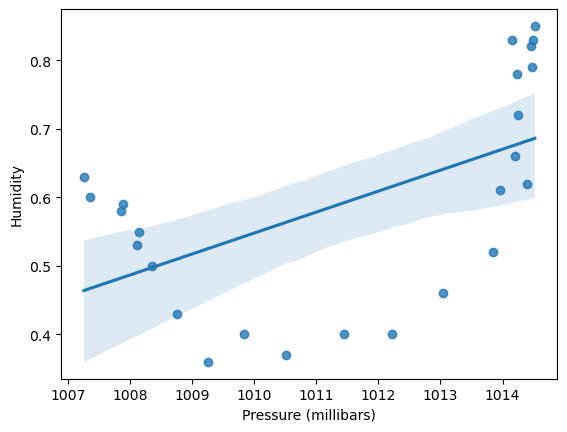

In [122]:
import seaborn as sns

sns.regplot(x=X,y=Y);

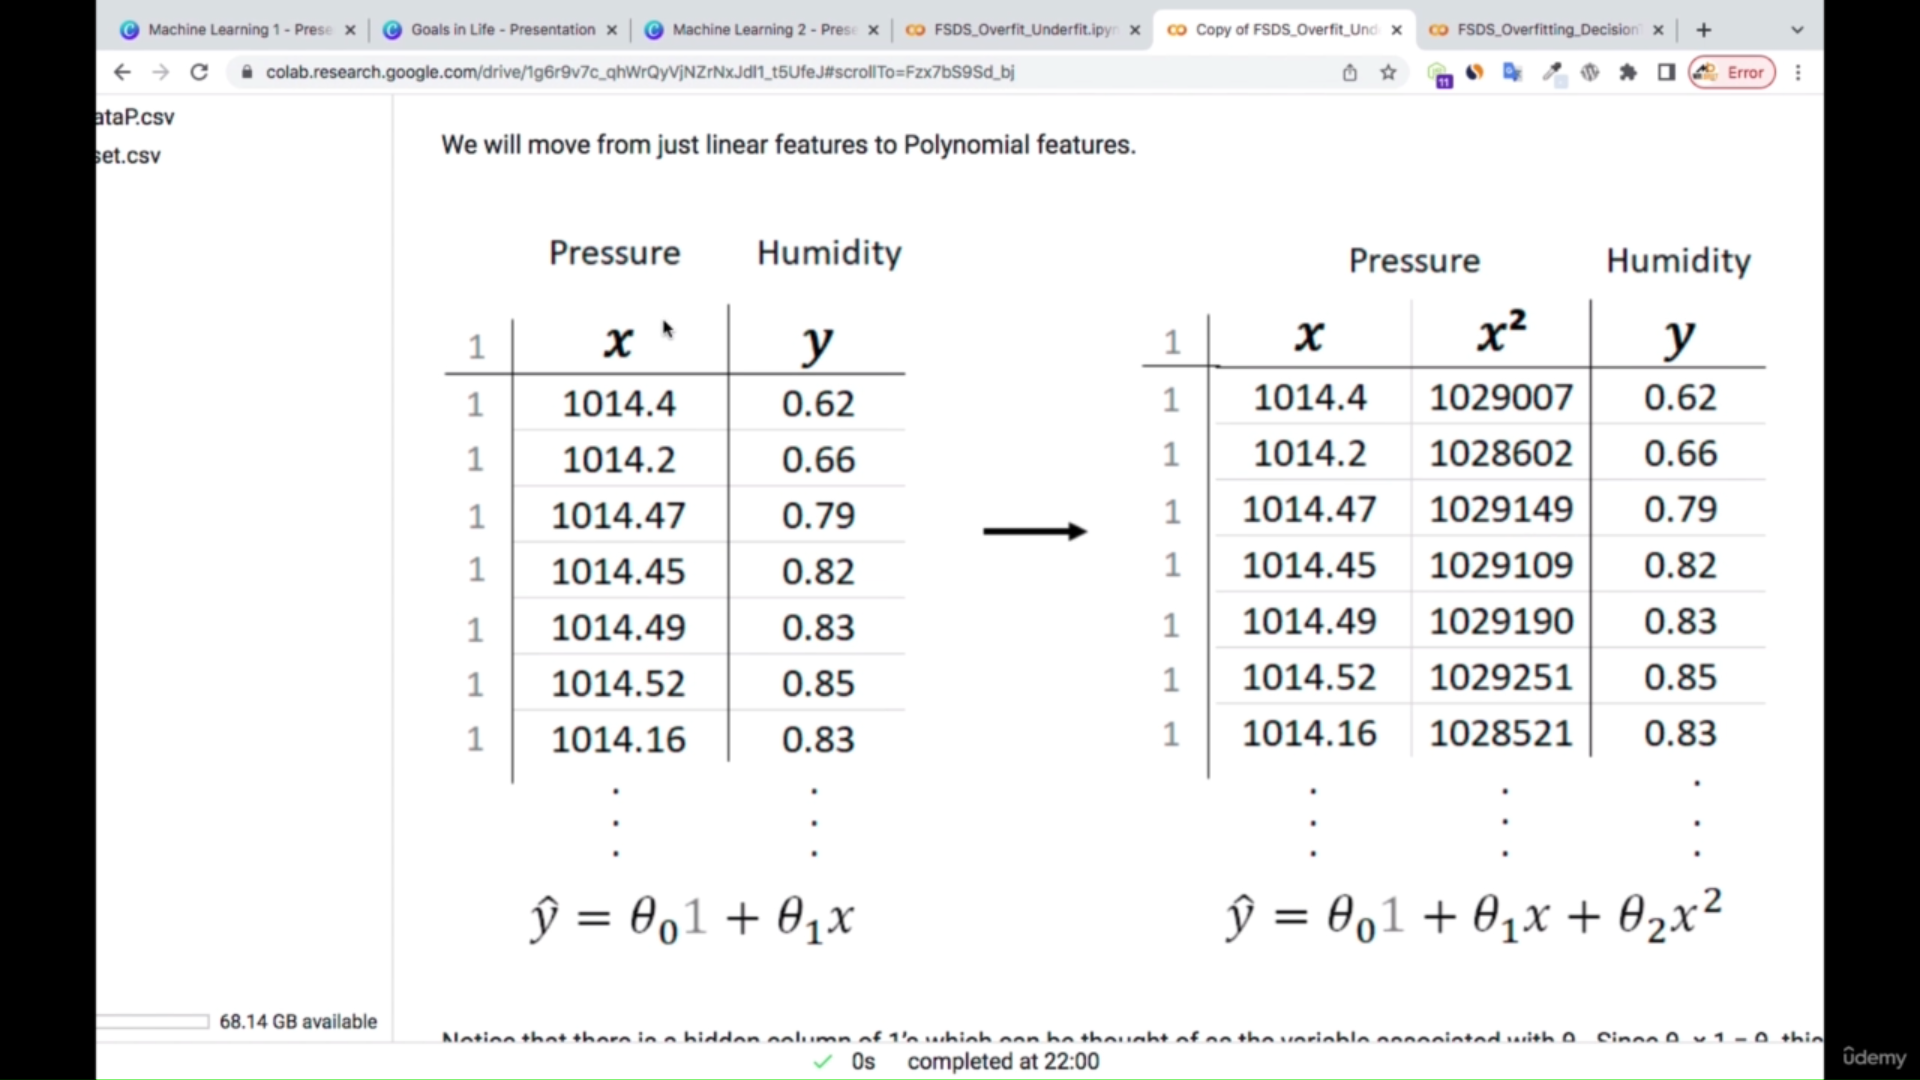

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
pre_process = PolynomialFeatures(degree=2)
x_poly = pre_process.fit_transform(X)
x_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [133]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1','x', 'x-Square']
df_x_poly

<IPython.core.display.Javascript object>

,1,x,x-Square
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


# building the Model again

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y,test_size=0.2,random_state=1)

In [141]:
model_lr = LinearRegression()
model_lr

LinearRegression()

In [142]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [149]:
y_pred = model_lr.predict(x_poly)
y_pred

array([0.7512093 , 0.70762429, 0.76702574, 0.76247704, 0.77159822,
       0.77850151, 0.69919259, 0.71615109, 0.71829765, 0.65846058,
       0.63707139, 0.50171561, 0.40441092, 0.34894187, 0.32999705,
       0.34880305, 0.3856825 , 0.43393244, 0.48323117, 0.51887218,
       0.51291998, 0.55987955, 0.5533092 , 0.64808432, 0.6678387 ])

In [146]:
print("Train Data: ", model_lr.score(X_train,Y_train)*100)
print("Test Data: ", model_lr.score(X_test,Y_test)*100)

Train Data:  82.126221972094
Test Data:  94.27391324502679


<IPython.core.display.Javascript object>

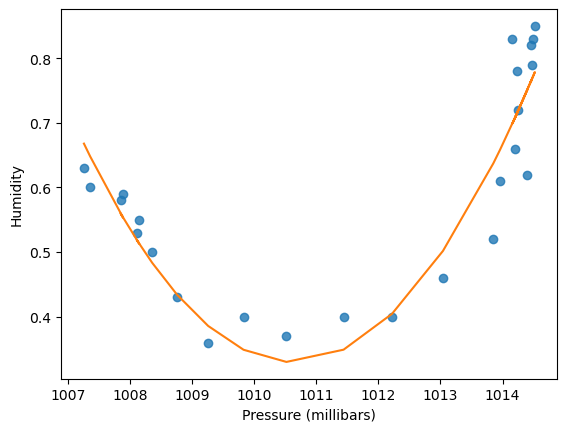

In [154]:
sns.regplot(x = X, y= Y, fit_reg=False)
plt.plot(X,y_pred);

<IPython.core.display.Javascript object>

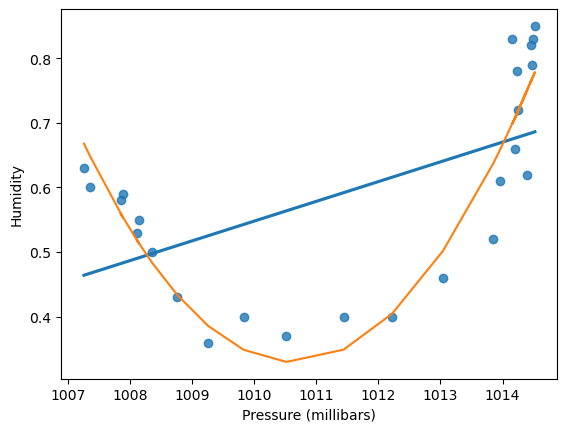

In [156]:
sns.regplot(x = X, y= Y, ci = None)
plt.plot(X,y_pred);